# ★ Trigonometric Interpolation And The FFT ★

In [1]:
# Import modules
import math
import cmath
import numpy as np
import scipy
import matplotlib.pyplot as plt

# 10.1 The Fourier Transform

## Lemma : Primitive roots pf unity

Let $\omega$ be a primitive bth root of unity and k be an integer. Then

### $\sum_{j=0}^{n-1}\omega^{jk} = 
\left\{\begin{matrix}
n & \text{if k/n is an integer } \\ 
0 & \text{otherwise} 
\end{matrix}\right.$

## Definition

The Discrete Fourier Transform (DFT) of $x = [x_0,\cdots,x_{n-1}]^T$ is the n-dimensional vector $y = [y_0,\cdots,y_{n-1}]$, where $\omega = e^{-i2\pi/n}$ and

### $y_k = \frac{1}{\sqrt{n}}\sum_{j=0}^{n-1}x_j\omega^{jk}$

## Definition

The magnitude of a complex vector $v$ is the real number $||v|| = \sqrt{\bar{v}^Tv}$. A square complex matrix F is unitary if $\bar{F}^TF=I$

## Example

Find the DFT of the vector $x = [1, 0, -1, 0]^T$

In [2]:
np.set_printoptions(precision=3)
x = np.array([1, 0, -1, 0]).T
w = complex(math.cos(math.pi * 2 / x.size), -math.sin(math.pi * 2 / x.size))
F = np.empty((x.size, x.size), dtype=complex) # Fourier matrix
for i in range(x.size):
    for j in range(x.size):
        F[i, j] = pow(w,(i * j))
y = (1 / math.sqrt(x.size)) * np.matmul(F, x)
print(np.round(y)) # [0, 1, 0, 1]

[0.+0.j 1.+0.j 0.-0.j 1.+0.j]


In [3]:
# Or use numpy fft (fast fourier transform)
print(np.fft.fft(x) / np.sqrt(x.size))

[0.+0.j 1.+0.j 0.+0.j 1.+0.j]


## Lemma 

Let $\{y_k\}$ be the DFT of $\{x_j\}$, where the $x_j$ are real numbers. Then 

1. $y_0$ is real
2. $y_{n-k} = \bar{y_k} \text{ for k} = 1,\cdots,n - 1$

# 10.2 Trigonometric Interpolation

## Lemma

Let $t = j/n$, where j and n are integers. Let k be an integer. Then $\cos2(n-k)\pi t = \cos2k\pi t$ and $\sin2(n - k)\pi t = - sin{2k\pi t}$

## Corollary

For an even integer n, let $t_j = c + j(d - c)/n$ for $j = 0,\cdots,n - 1$, and let $x = (x_0,\cdots,x_{n-1})$ denote a vector of n real numbers. Define $\overrightarrow{a} + \overrightarrow{b}i = F_nx$, where $F_n$ is the Discrete Fourier Transform. Then the function 

### $P_n(t) = \frac{a_0}{\sqrt{n}} + \frac{2}{\sqrt{n}}\sum_{k=1}^{n/2-1}(a_k\cos{\frac{2k\pi (t-c)}{d-c}}-b_k\sin{\frac{2k\pi (t-c)}{d-c}})+\frac{a_{n/2}}{\sqrt{n}}cos{\frac{n\pi (t-c)}{d-c}}$ 

satisfies $P_n(t_j) = x_j$ for $j = 0,\cdots,n-1$

In [4]:
def even_trigonometric_interpolant(t, a, b, c, d):
    return a[0] / np.sqrt(a.size) + 2 / np.sqrt(a.size) * \
        np.sum([a[k] * np.cos(2 * k * np.pi * (t - c) / (d - c)) - \
        b[k] * np.sin(2 * k * np.pi * (t - c) / (d - c)) for k in range(1, int(a.size / 2))]) + \
        a[int(a.size / 2)] / np.sqrt(a.size) * np.cos(a.size * np.pi * (t - c) / (d - c))

## Example 

Find the trigonometric interpolant for $x = [1, 0, -1, 0]^T$

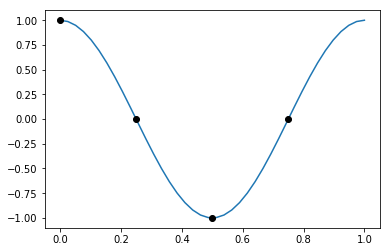

In [5]:
c, d = 0, 1
x = np.array([1, 0, -1, 0]).T
y = np.fft.fft(x) / np.sqrt(x.size)
a = np.array(y.real)
b = np.array(y.imag)
f = lambda t, a, b, c, d : a[0] / np.sqrt(a.size) + 2 / np.sqrt(a.size) * \
np.sum([a[k] * np.cos(2 * k * np.pi * (t - c) / (d - c)) - \
        b[k] * np.sin(2 * k * np.pi * (t - c) / (d - c)) for k in range(1, int(a.size / 2))]) + \
a[int(a.size / 2)] / np.sqrt(a.size) * np.cos(a.size * np.pi * (t - c) / (d - c))

t = np.linspace(c, d, 40)
xt = np.linspace(0, 1, 4, False)
data = [f(i, a, b, c, d) for i in t]

plt.plot(t, data)
plt.plot(xt, x, 'o', color='k')
plt.show()

### Example

Find the trigonometric interpolant for the temperature data : $x = [-2.2, -2.8, -6.1, -3.9, 0.0, 1.1, -0.6, -1.1]$ on the interval $[0,1]$

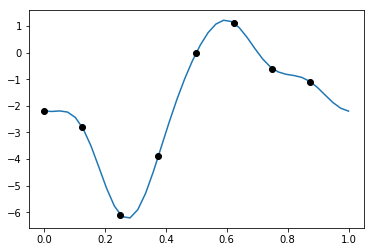

In [6]:
c, d = 0, 1
xt = np.linspace(c, d, 8, False)
x = np.array([-2.2, -2.8, -6.1, -3.9, 0, 1.1, -0.6, -1.1])
y = np.fft.fft(x) / np.sqrt(x.size)
a = np.array(y.real)
b = np.array(y.imag)
t = np.linspace(c, d, 40)
data = [even_trigonometric_interpolant(i, a, b, c, d) for i in t]
plt.plot(t, data)
plt.plot(xt, x, 'o', color='k')
plt.show()

# 10.3 The FFT And Signal Processing

## Orthogonal Function Interpolation Theorem

Let f_0(t),\cdots,\f_{n-1}(t) be functions of t and $t_0,\cdots,t_{n-1}$ be real numbers. Assume that the $n \times n$ matrix

### $A = 
\begin{bmatrix}
f_0(t_0) & f_0(t_1) & \cdots & f_0(t_{n-1})  \\ 
f_1(t_0) & f_1(t_1) & \cdots & f_1(t_{n-1})  \\ 
\vdots & \vdots &  & \vdots \\ 
f_{n-1}(t_0) & f_{n-1}(t_1) & \cdots & f_{n-1}(t_{n-1}) 
\end{bmatrix} $

is a real $n \times n$ otrhogonal matrix. If $y = Ax$, the function

### $F(t) = \sum_{k = 0}^{n-1}y_kf_k(t)$

interpolates $(t_0, x_0), \cdots, (t_{n-1}, x_{n-1})$, that is $F(t_j) = x_j$ for $j = 0,\cdots,n-1$

## Lemma

Let $n \ge 1$ and k, l be integers. Then

### $\sum_{j = 0}^{n-1}\cos{\frac{2\pi jk}{n}}\cos{\frac{2\pi jl}{n}} =  \left\{\begin{matrix}
n & \text{if both (k-l)/n and (k+l)/n are integers} \\ 
\frac{n}{2} & \text{if exactly one of (k-l)/n and (k+l)/n is an integer} \\ 
0 & \text{if neither is an integer}
\end{matrix}\right.$

### $\sum_{j = 0}^{n-1}\cos{\frac{2\pi jk}{n}}\sin{\frac{2\pi jl}{n}} = 0$

### $\sum_{j = 0}^{n-1}\sin{\frac{2\pi jk}{n}}\sin{\frac{2\pi jl}{n}} =  \left\{\begin{matrix}
0 & \text{if both (k-l)/n and (k+l)/n are integers} \\ 
\frac{n}{2} & \text{if (k-l)/n is an integer and (k+l)/n is not} \\ 
-\frac{n}{2} & \text{if (k-l)/n is not and (k+l)/n is an integer} \\ 
0 & \text{if neither is an integer}
\end{matrix}\right.$

## Orthogonal Function Least Squares Approximation Theorem

Let $m \le n$ be integers, and assume that data $(t_0,x_0),\cdots,(t_{n-1},x_{n-1})$ are given. Set $y = Ax$, where A is an orthogonal matrix of form like Orthogonal Function Interpolation Theorem show. Then the interpolating polynomial for basis functions $f_0(t),\cdots,f_{n-1}(t)$ is

### $F_n(t) = \sum_{k = 0}^{n - 1}y_kf_k(t)$

and the best least squares approximation, using only the functions $f_0,\cdots,f_{m-1}$, is

### $F_m(t) = \sum_{k = 0}^{m - 1}y_kf_k(t)$

## Corollary

Let $[c,d]$ be an interval, let $m < n$ be even positive integers, $x = (x_0,\cdots,x_{n-1})$ a vector of n real numbers, and let $t_j = c + j(d - c)/n$ for $j=0,\cdots,n-1$. Let ${a_0,a_1,b_1,a_2,b_2,\cdots,a_{n/2-1},b_{n/2-1},a_{n/2}} = F_nx$ be the interpolating coefficients for x so that

### $x_j = P_n(t_j) = \frac{a_0}{\sqrt{n}} + \frac{2}{\sqrt{n}}\sum_{k=1}^{n/2-1}(a_k\cos{\frac{2k\pi (t_j-c)}{d-c}}-b_k\sin{\frac{2k\pi (t_j-c)}{d-c}})+\frac{a_{n/2}}{\sqrt{n}}cos{\frac{n\pi (t_j-c)}{d-c}}$

for $j = 0,\cdots,n-1$. Then

### $P_m(t) = \frac{a_0}{\sqrt{n}} + \frac{2}{\sqrt{n}}\sum_{k=1}^{\frac{m}{2}-1}(a_k\cos{\frac{2k\pi (t-c)}{d-c}}-b_k\sin{\frac{2k\pi (t-c)}{d-c}})+\frac{a_{\frac{m}{2}}}{\sqrt{n}}cos{\frac{n\pi (t-c)}{d-c}}$

is the best least squares fit of order m to the data $(t_j,x_j)$ for $j = 0,\cdots,n - 1$

In [7]:
def least_squares_even_trigonmetric(m, t, a, b, c, d):
     return a[0] / np.sqrt(a.size) + 2 / np.sqrt(a.size) * \
        np.sum([a[k] * np.cos(2 * k * np.pi * (t - c) / (d - c)) - \
        b[k] * np.sin(2 * k * np.pi * (t - c) / (d - c)) for k in range(1, int(m / 2))]) + \
        a[int(m / 2)] / np.sqrt(a.size) * np.cos(a.size * np.pi * (t - c) / (d - c))

### Example

Fit the temperature data by least squares trigonometric functions of orders 4 and 6 where $x = [-2.2, -2.8, -6.1, -3.9, 0.0, 1.1, -0.6, -1.1]$ on the interval $[0,1]$

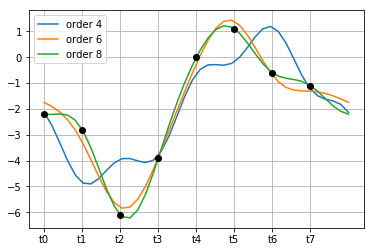

In [8]:
m1, m2, m3 = 4, 6, 8
c, d = 0, 1
xt = np.linspace(c, d, 8, False)
x = np.array([-2.2, -2.8, -6.1, -3.9, 0, 1.1, -0.6, -1.1])
y = np.fft.fft(x) / np.sqrt(x.size)
a = np.array(y.real)
b = np.array(y.imag)
t = np.linspace(c, d, 40)
data1 = [least_squares_even_trigonmetric(m1, i, a, b, c, d) for i in t]
data2 = [least_squares_even_trigonmetric(m2, i, a, b, c, d) for i in t]
data3 = [least_squares_even_trigonmetric(m3, i, a, b, c, d) for i in t]
plt.xticks(xt, ['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7'])
plt.plot(t, data1, label='order 4')
plt.plot(t, data2, label='order 6')
plt.plot(t, data3, label='order 8')
plt.plot(xt, x, 'o', color='k')
plt.legend()
plt.grid(True)
plt.show()